<a href="https://colab.research.google.com/github/Sarasswati/Airlines_Passenger_Referral/blob/main/Airlines_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Presence of online review has provided different businesses to explore those reviews to get a better understanding of consumer’s reaction and to ﬁnd where they have to improve in this cutting edge competition especially in airline there are always many options between same routes that review will be most of the time effect, if they are going to choose that airline or not. Review data are unstructured which are sometimes irregularities, ambiguities and in a very large amount that it is very difﬁcult to analyze those manually.

In this project, we have dataset having data including airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The main objective is to predict whether passengers will refer the airline to their friends.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import scipy.sparse
import missingno as msno
warnings.filterwarnings('ignore')

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix
from datetime import datetime
import dateutil
import lightgbm as lgb
import importlib

from sklearn.ensemble import VotingClassifier
import shap 
import graphviz

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone_Project_3/Airline_Passenger_Referral/'
air_df = pd.read_excel(working_directory + 'data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
air_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
air_df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
air_df.duplicated().sum()

70711

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
air_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

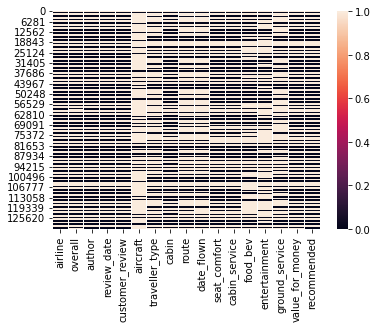

In [ ]:
# Visualizing the missing values
sns.heatmap(air_df.isnull(), cbar=True)

### What did you know about your dataset?

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
air_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Datatypes
air_df.dtypes

airline             object
overall            float64
author              object
review_date         object
customer_review     object
aircraft            object
traveller_type      object
cabin               object
route               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object

In [ ]:
# Dataset Describe
air_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


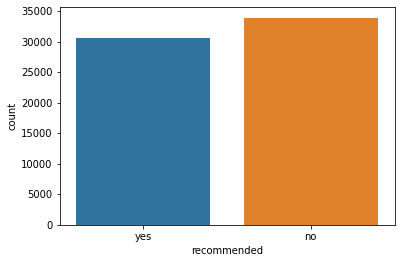

In [ ]:
sns.countplot(x=air_df['recommended'])

### Variables Description 

### Data fields
Feature descriptions briefly as follows:
* #### airline: Name of the airline.
* #### overall: Overall point is given to the trip between 1 to 10.
* #### author: Author of the trip
* #### reviewdate: Date of the Review customer review: Review of the customers in free text format
* #### aircraft: Type of the aircraft
* #### travellertype: Type of traveler (e.g. business, leisure)
* #### cabin: Cabin at the flight date flown: Flight date
* #### seatcomfort: Rated between 1-5
* #### cabin service: Rated between 1-5
* #### foodbev: Rated between 1-5 entertainment: Rated between 1-5
* #### groundservice: Rated between 1-5
* #### valueformoney: Rated between 1-5
* #### recommended: Binary, target variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
air_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
new_df = air_df.copy()

In [ ]:
# Split the string by the first occurrence of '.' and get the second part of the string.
new_df['customer_review_clean'] = new_df['customer_review'].str.split('.',n=1,expand=True)[1]

In [ ]:
new_df.drop(columns=['customer_review'], inplace=True)

In [ ]:
# For ease of access, we rename some columns
new_df.rename(columns={'overall':'review_score', 'customer_review_clean':'review_text'}, inplace=True)
# Drop the author field as we don't need it.
new_df.drop(columns=['author'], inplace=True)

In [ ]:
# Unique values of recommended feature
new_df['recommended'].unique()

array([nan, 'yes', 'no'], dtype=object)

In [ ]:
# Add a boolean feature indicating whether the flight is recommend by the user or not
def get_recommendation_bool(df_row):
    """
    Return the Boolean value corresponding to the recommendation.
    """
    rec_bool = None
    if df_row['recommended'] == 'yes':
        rec_bool = 1
    elif df_row['recommended'] == 'no':
        rec_bool = 0
    else:
        rec_bool = None
    return rec_bool

In [ ]:
new_df['recommended_bool'] = new_df.apply(lambda x: get_recommendation_bool(x), axis=1)
new_df.drop(columns=['recommended'], inplace=True)
new_df.rename(columns={'recommended_bool':'recommended'}, inplace=True)

In [ ]:
# datetime timestamp
def get_review_date_timestamp(df_row):
    """
    Return the timestamp of the review date.
    """
    review_date_timestamp = None
    if (str(df_row['review_date']) == 'nan'):
        review_date_timestamp = None
    else:
        review_date_timestamp = dateutil.parser.parse(df_row['review_date'])
    return review_date_timestamp

In [ ]:
new_df['review_date_timestamp'] = new_df.apply(lambda x: get_review_date_timestamp(x), axis=1)

In [ ]:
# Fetch the day
def get_review_date_day(df_row):
    """
    Return the day of the review date.
    """
    review_date_day = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_day = None
    else:
        review_date_day = df_row['review_date_timestamp'].day
    return review_date_day

# Fetch the month
def get_review_date_month(df_row):
    """
    Return the month of the review date.
    """
    review_date_month = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_month = None
    else:
        review_date_month = df_row['review_date_timestamp'].month
    return review_date_month

# Fetch the year
def get_review_date_year(df_row):
    """
    Return the year of the review date.
    """
    review_date_year = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_year = None
    else:
        review_date_year = df_row['review_date_timestamp'].year
    return review_date_year

In [ ]:
# Add other augmented features
new_df['review_date_day'] = new_df.apply(lambda x: get_review_date_day(x),axis=1)
new_df['review_date_month'] = new_df.apply(lambda x: get_review_date_month(x),axis=1)
new_df['review_date_year'] = new_df.apply(lambda x: get_review_date_year(x),axis=1)

In [ ]:
# Fetch the number of seconds the review date
def get_review_date_sec_epoch(df_row):
    """
    Return the seconds since the epoch of the review date.
    """
    review_date_sec_epoch = None
    if (str(df_row['review_date_timestamp']) == 'NaT'):
        review_date_sec_epoch = None
    else:
        review_date_sec_epoch = df_row['review_date_timestamp'].timestamp()
    return review_date_sec_epoch

In [ ]:
new_df['review_date_sec_epoch'] = new_df.apply(lambda x: get_review_date_sec_epoch(x),axis=1)

In [ ]:
def get_date_flown_timestamp(df_row):
    """
    Return the timestamp of the date flown.
    """
    date_flown_timestamp = None
    if (str(df_row['date_flown']) == 'nan'):
        date_flown_timestamp = None
    elif (isinstance(df_row['date_flown'], datetime)):
        date_flown_timestamp = df_row['date_flown']
    else:
        date_flown_timestamp = dateutil.parser.parse(df_row['date_flown'])
    return date_flown_timestamp

In [ ]:
new_df['date_flown_timestamp'] = new_df.apply(lambda x: get_date_flown_timestamp(x), axis=1)

In [ ]:
def get_date_flown_day(df_row):
    """
    Return the day of the date flown.
    """
    date_flown_day = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_day = None
    else:
        date_flown_day = df_row['date_flown_timestamp'].day
    return date_flown_day

def get_date_flown_month(df_row):
    """
    Return the month of the date flown.
    """
    date_flown_month = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_month = None
    else:
        date_flown_month = df_row['date_flown_timestamp'].month
    return date_flown_month

def get_date_flown_year(df_row):
    """
    Return the year of the date flown.
    """
    date_flown_year = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_year = None
    else:
        date_flown_year = df_row['date_flown_timestamp'].year
    return date_flown_year

In [ ]:
# Add some more features
new_df['date_flown_day'] = new_df.apply(lambda x: get_date_flown_day(x),axis=1)
new_df['date_flown_month'] = new_df.apply(lambda x: get_date_flown_month(x),axis=1)
new_df['date_flown_year'] = new_df.apply(lambda x: get_date_flown_year(x),axis=1)

In [ ]:
def get_date_flown_sec_epoch(df_row):
    """
    Return the seconds since the epoch of the date flown.
    """
    date_flown_sec_epoch = None
    if (str(df_row['date_flown_timestamp']) == 'NaT'):
        date_flown_sec_epoch = None
    else:
        date_flown_sec_epoch = df_row['date_flown_timestamp'].timestamp()
    return date_flown_sec_epoch

In [ ]:
new_df['date_flown_sec_epoch'] = new_df.apply(lambda x: get_date_flown_sec_epoch(x),axis=1)

In [ ]:
def get_review_date_date_flown_distance_days(df_row):
    """
    Return the time distance in days from the date flown to the review date.
    """
    review_date_date_flown_distance_days = None
    if (df_row['review_date_timestamp'] is None or df_row['date_flown_timestamp'] is None or df_row['review_date'] == pd.NaT or df_row['date_flown'] == pd.NaT or df_row['review_date_timestamp'] == np.NaN or df_row['date_flown_timestamp'] == np.NaN or str(df_row['review_date_timestamp']) == 'NaT' or str(df_row['date_flown_timestamp']) == 'NaT'):
        review_date_date_flown_distance_days = None
    else:
        # print(df_row['review_date_timestamp'])
        # print(df_row['date_flown_timestamp'])
        # review_date_flown_distance = dt.datetime.fromtimestamp(df_row['review_date_timestamp'])-dt.datetime.fromtimestamp(df_row['date_flown_timestamp'])
        review_date_date_flown_distance = df_row['review_date_timestamp']-df_row['date_flown_timestamp']
        review_date_date_flown_distance_days = review_date_date_flown_distance.days
    return review_date_date_flown_distance_days

In [ ]:
# Add the difference of days between the travel date and the review date
new_df['review_date_date_flown_distance_days'] = new_df.apply(lambda x: get_review_date_date_flown_distance_days(x),axis=1)

In [ ]:
# We will add another feature stating if the review is complete or not i.e. True if all fields are there and False otherwise
def get_completeness(df_row):
    """
    Return true if the review contains all fields and false otherwise.
    """
    is_complete = None
    is_not_complete = df_row.isnull().any()
    if (is_not_complete == True):
        is_complete = False
    else:
        is_complete = True
    return is_complete

In [ ]:
new_df['is_complete'] = new_df.apply(lambda x: get_completeness(x),axis=1)

In [ ]:
# We will add 2 more features indicating the characters and words respectively.
def get_review_characters(df_row):
    """
    Return the number of characters in the review.
    """
    review_characters = None
    if (str(df_row['review_text'])=='nan' or df_row['review_text'] is None):
        review_characters = 0
    else:
        review_characters = len(df_row['review_text'])
    return review_characters

In [ ]:
def get_review_words(df_row):
    """
    Return the number of words in the review.
    """
    review_words = None
    if (str(df_row['review_text'])=='nan' or df_row['review_text'] is None):
        review_words = 0
    else:
        review_words = len(df_row['review_text'].split(' '))
    return review_words

In [ ]:
new_df['review_characters'] = new_df.apply(lambda x: get_review_characters(x),axis=1)
new_df['review_words'] = new_df.apply(lambda x: get_review_words(x),axis=1)

In [ ]:
# Unique values of review scores
new_df['review_score'].unique()

array([nan,  7.,  2.,  3., 10.,  1.,  6.,  8.,  5.,  4.,  9.])

In [ ]:
# We will classify the review score into one of the 3 categories: Positive, Neutral and Negative
def get_pos_neu_neg_review_score(df_row):
    """
    Return:
    - 'pos' if the review score is positive (>=7),
    - 'neu' if the review score is neutral (5 or 6),
    - 'neg' if the review score is negative (<=4).
    """
    pos_neu_neg_review_score = None
    if (df_row['review_score'] is np.nan):
        pos_neu_neg_review_score = None
    else:
        if (df_row['review_score'] <= 4):
            pos_neu_neg_review_score = 'Negative'
        elif (df_row['review_score'] > 4 and df_row['review_score'] <= 6):
            pos_neu_neg_review_score = 'Neutral'
        elif (df_row['review_score'] > 6):
            pos_neu_neg_review_score = 'Positive'
        else:
            pos_neu_neg_review_score = None
    return pos_neu_neg_review_score

In [ ]:
new_df['pos_neu_neg_review_score'] = new_df.apply(lambda x: get_pos_neu_neg_review_score(x),axis=1)
new_df[['review_score','pos_neu_neg_review_score']].head()

,review_score,pos_neu_neg_review_score
0,NaN,None
1,7.0,Positive
2,NaN,None
3,2.0,Negative
4,NaN,None


In [ ]:
def get_origin(df_row):
    """
    Return the origin of the flight.
    """
    origin = None
    if str(df_row['route'])=='nan':
        origin = None
    else:
        origin = df_row['route'].split(' to ')[0]
    return origin

def get_destination(df_row):
    """
    Return the destination of the flight.
    """
    destination = None
    if str(df_row['route'])=='nan':
        destination = None
    else:
        # print(df_row['route'])
        temp = df_row['route'].split(' to ')
        # Standard case, there is a string before ' to ' and a string after ' to '.
        if len(temp)==2:
            destination = temp[1].split(' via ')[0]
        # Special case, the second space in ' to ' is missing.
        elif len(temp)==1:
            temp2 = df_row['route'].split(' to')
            if len(temp2)==2:
                destination = temp2[1].split(' via ')[0]
        else:
            destination = None
    return destination

def get_layover(df_row):
    """
    Return the layover of the flight.
    """
    layover = None
    if str(df_row['route'])=='nan':
        layover = None
    else:
        # print(df_row['route'])
        temp = df_row['route'].split(' via ')
        # There is no ' via ' in the route, no layover.
        if len(temp) == 1:
            layover = 'NA'
        # There is a ' via ' in the route, layover available.
        elif len(temp) == 2:
            layover = temp[1]
        else:
            layover = None
    return layover

In [ ]:
new_df['origin'] = new_df.apply(lambda x: get_origin(x), axis=1)
new_df['destination'] = new_df.apply(lambda x: get_destination(x), axis=1)
new_df['layover'] = new_df.apply(lambda x: get_layover(x), axis=1)

In [ ]:
# Add another feature if the flight has a layover
def has_layover(df_row):
    """
    Return True if the review score corresponds to a flight with layover and False otherwise.
    """
    layover = False
    if df_row['layover'] is not None and str(df_row['layover']) != 'NA':
        layover = True
    return layover

In [ ]:
new_df['has_layover'] = new_df.apply(lambda x: has_layover(x), axis=1)

In [ ]:
# Dropping not required features
new_df.drop(columns=['aircraft', 'route', 'origin', 'destination', 'layover'],inplace=True)

In [ ]:
new_df['is_complete'].unique()

array([False,  True])

In [ ]:
new_df.drop(columns=['is_complete'], inplace=True)

In [ ]:
df_for_training_small = new_df.drop(columns=['review_words']).copy()

In [ ]:
# checking for duplicate reviews
df_same_review_text = df_for_training_small.groupby('review_text')['review_text'].count().reset_index(name='n_reviews').sort_values(by='n_reviews',ascending=False)
df_same_review_text[df_same_review_text['n_reviews']>1]

,review_text,n_reviews
0,,84
56280,We flew regular Air Canada Toronto to Palm Be...,6
22988,I had no idea that it was Rouge until I compl...,6
33908,No leg room unless you upgrade your seat or a...,4
29967,Just to give less service. Had booked premium...,4
...,...,...
10651,Departed on time arrived good 20 min early. E...,2
10667,Departing at 9:45 pm. Crew managed to serve d...,2
15644,Flight time from HK to Bali changed twice pri...,2
15742,Flight was 2 hrs long. The only inflight ente...,2


In [ ]:
cols_for_training = new_df.columns.to_list()
feats_bool = ['has_layover']
feats_cat = ['airline', 'traveller_type', 'cabin','review_text', 'pos_neu_neg_review_score']
feats_num = [feat for feat in cols_for_training if feat not in feats_bool and feat not in feats_cat]

In [ ]:
cols_for_training_small = df_for_training_small.columns.to_list()
feats_num_for_training_small = [feat for feat in cols_for_training_small if feat not in feats_bool and feat not in feats_cat]

In [ ]:
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']]
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']]['has_layover']
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']][feats_num_for_training_small]
df_for_training_small[df_for_training_small['review_text']==df_same_review_text.loc[5845,:]['review_text']][feats_cat]

,airline,traveller_type,cabin,review_text,pos_neu_neg_review_score
95659,Cathay Pacific Airways,NaN,Economy Class,Beside getting the excellent service from gro...,Negative
104035,Cathay Pacific Airways,NaN,Economy Class,Beside getting the excellent service from gro...,Negative


In [ ]:
# Taking non-duplicate features only
df_no_duplicates = df_for_training_small.drop_duplicates().copy()

In [ ]:
n_reviews_no_duplicates = df_no_duplicates.shape[0]
print('Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: {:d}'.format(n_reviews_no_duplicates))

Number of customer reviews in the dataset, excluding all missing values and dropping duplicates: 61183


### What all manipulations have you done and insights you found?

* Split the string by the first occurrence of '.' and get the second part of the string from customer_review to new column customer_review_clean, then remove column customer_review.
* Rename overall column to review_score and customer_review_clean column to review_text.
* Dependent variable recommended has three unique values: ‘yes’, ‘no’ and nan. Converted dependent variable to relevant numerical values 1 or 0 in a new column recommended_bool, then removed recommended and renamed recommended_bool to recommended.
* The columns 'is_complete', 'route', 'origin', 'destination' and 'layover' are ambiguous in the sense that these columns contain a mix of airport city, airport name and airport codes. So removed these columns.

The following features are added to the dataset:

* review_date_timestamp
* review_date_day
* review_date_month
* review_date_year
* review_date_sec_epoch
* date_flown_timestamp
* date_flown_day
* date_flown_month
* date_flown_year
* date_flown_sec_epoch
* review_date_date_flown_distance_days
* pos_neu_neg_review_score
* has_layover

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0.0    33894
1.0    30546
Name: recommended, dtype: int64
 


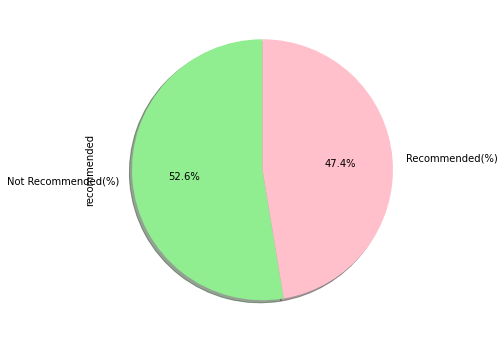

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(new_df.recommended.value_counts())
print(" ")
# Dependant Variable Column Visualization
new_df['recommended'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Recommended(%)','Recommended(%)'],
                               colors=['lightgreen','pink'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 30546 passengers have recommended which is 52.6% of the whole passegner data given in the dataset. In other hand, 33894 passengers did not recommend which is 47.4% of the whole passenger data given in the dataset.

47.4% passengers did not recommend the airline which is on higher side. So, Immediate action should be taken to improve services based on reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Passengers who did not recommend the airline the travelled in, may lead to loss of passengers. It is one of the key business metrics to increase the number of passengers.

It's easy to loose passengers but sometimes difficult to aquire one because of competitive market. One unhappy passenger will make 3-4 passengers away those might be acquired by the airline with "POWER OF WORDS". Its easy to understand  that wrong and bad reviews spread first.

#### Chart - 2

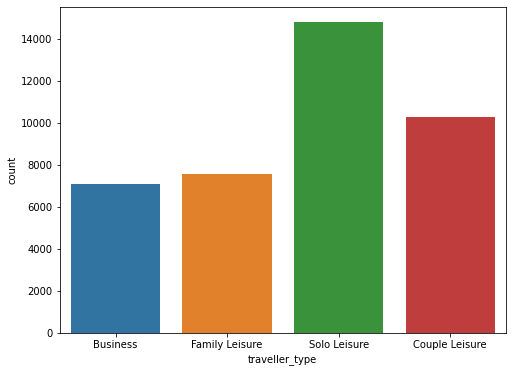

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8,6))
sns.countplot(air_df['traveller_type'])

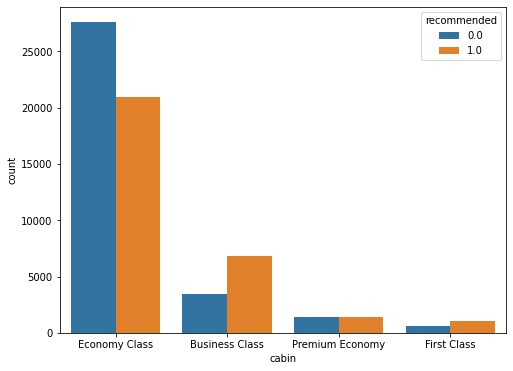

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(new_df['cabin'],hue=new_df['recommended'])

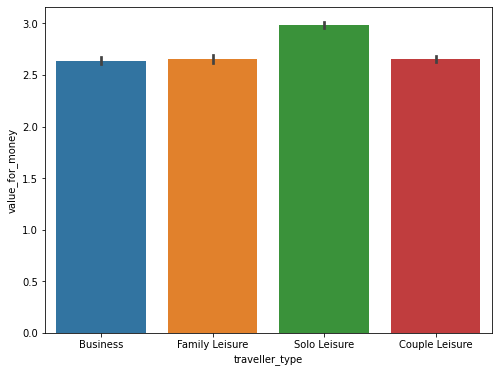

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=new_df['traveller_type'],y=new_df['value_for_money'])

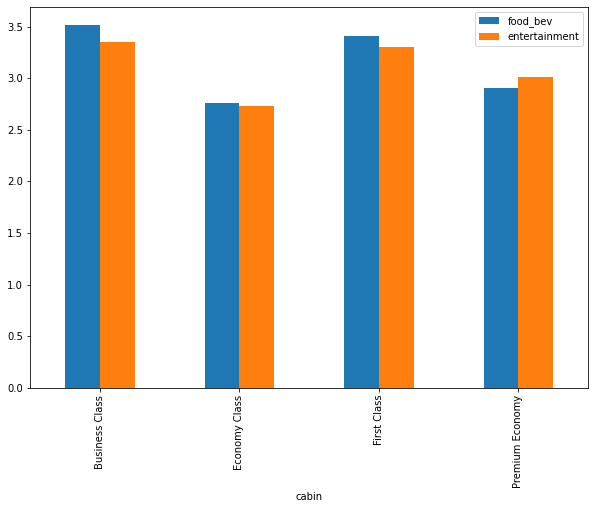

In [ ]:
eda_4=new_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

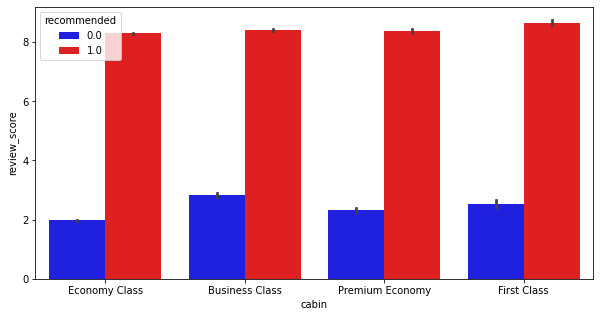

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(new_df.cabin, new_df.review_score, hue = new_df['recommended'], palette= ['blue','red'])

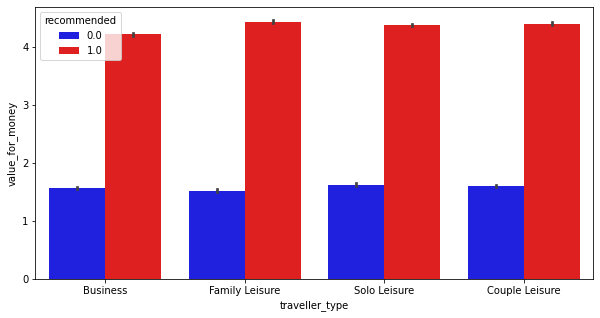

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(new_df.traveller_type, new_df.value_for_money, hue = new_df['recommended'], palette= ['blue','red'])

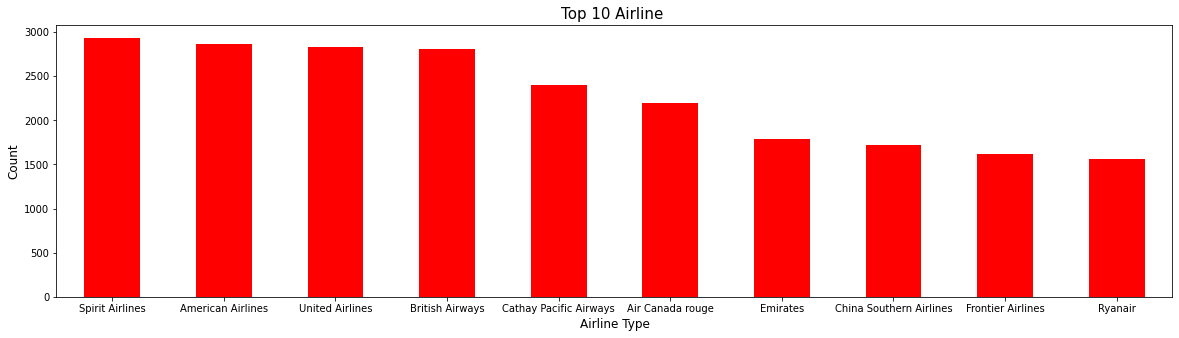

In [ ]:
# Get the number of trips each airline make.
trip_by_airlines = new_df['airline'].value_counts()
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'red')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

I've use bar chart to show following information:

* Which Traveller_type has more ratings?
* Which type of Cabin has more recommendation?
* Is it Solo Leisure worth for Money?
* In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?
* Which cabin type has overall service ratings?
* Which travellers_type has overall service ratings?
* Which airline made highest trips?

##### 2. What is/are the insight(s) found from the chart?

* Travelling type of Solo Leisure has more ratings.
* Economy class has highest recommendation with bad reviews followed by Business class, Premium economy and First class.
* Travelling Type of Solo Leisure worth of Money compare to other type of travelling.
* In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.
* First class travellers are least likely to recommend the airlines.
* Recommendation is most probable when the cabin service is given full star rating ie 5 out of 5 here.
* In economy class if we got ratings between 4 to 5 that means airlines recommended.
* If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers. If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.
* When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.
* Economy class is the most recommended cabin type, whereas business class is the least recommended one.
* We have observed that the top 10 airlines with most trips are: Spirit Airlines, American Airlines, United Airlines, British Airways, Emirates, China southern airline, Frontier airlines, Ryanair, Delta air lines, Turkish airlines.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Airlines need to work on Economy class to improve their ratings as it highly recommended as well as not-recommended.
* Airlines need to work on facilities to improve their rating.
* Business class and Premoum class packages and facilities can be modified to make more recommendation and hence increasing profit.

#### Chart - 3

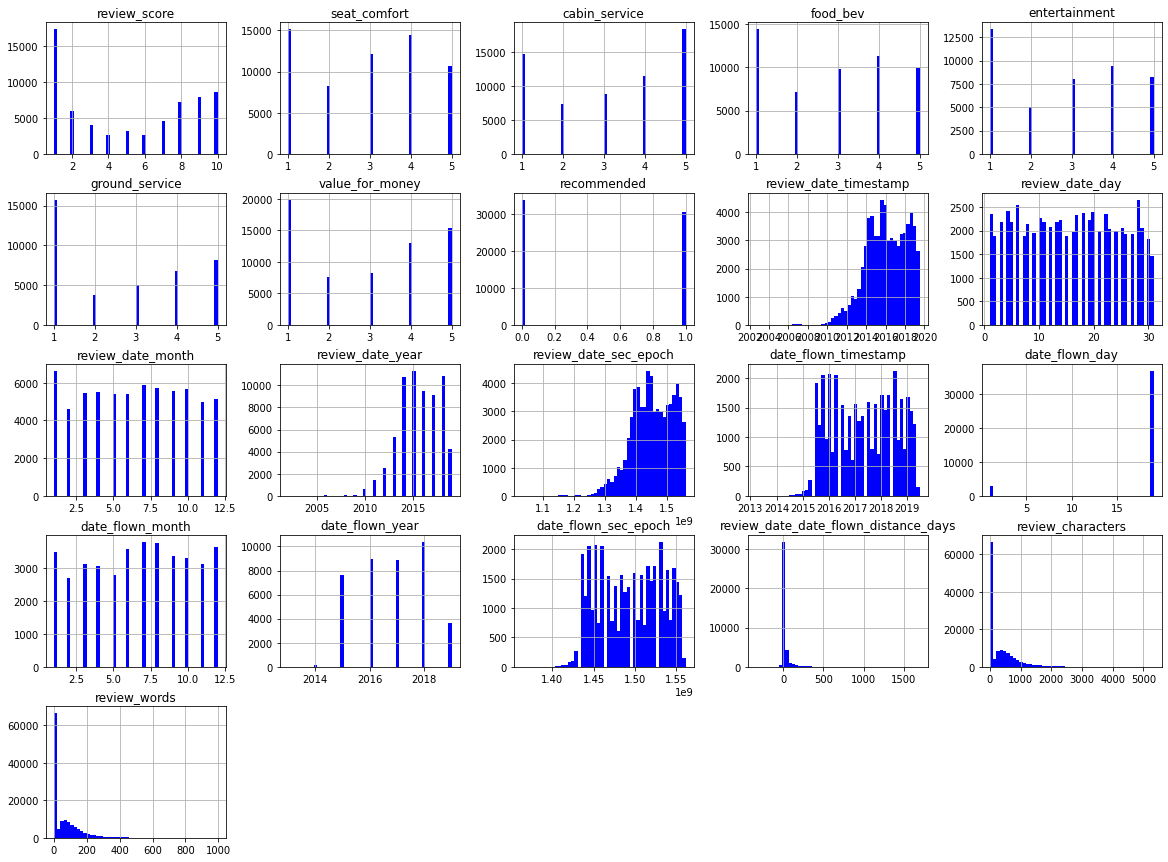

In [ ]:
# Chart - 3 visualization code
#frequency distribution using histgram
new_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are visualization tools that represent the distribution of a set of continuous data. In a histogram, the data is divided into a set of intervals or bins (usually on the x-axis) and the count of data points that fall into each bin corresponding to the height of the bar above that bin.

I've used this plot to visualize frequency disribution of the features.

##### 2. What is/are the insight(s) found from the chart?

* From above plot the overall feature ratings of 1 to 2 occur more frequently.
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Airlines need to focus on seat comfort.
* Airlines need to work on Food & beverages and Entertaiment.
* Airlines need to look into overall features as they are getting low rating for money value features.

#### Chart - 4

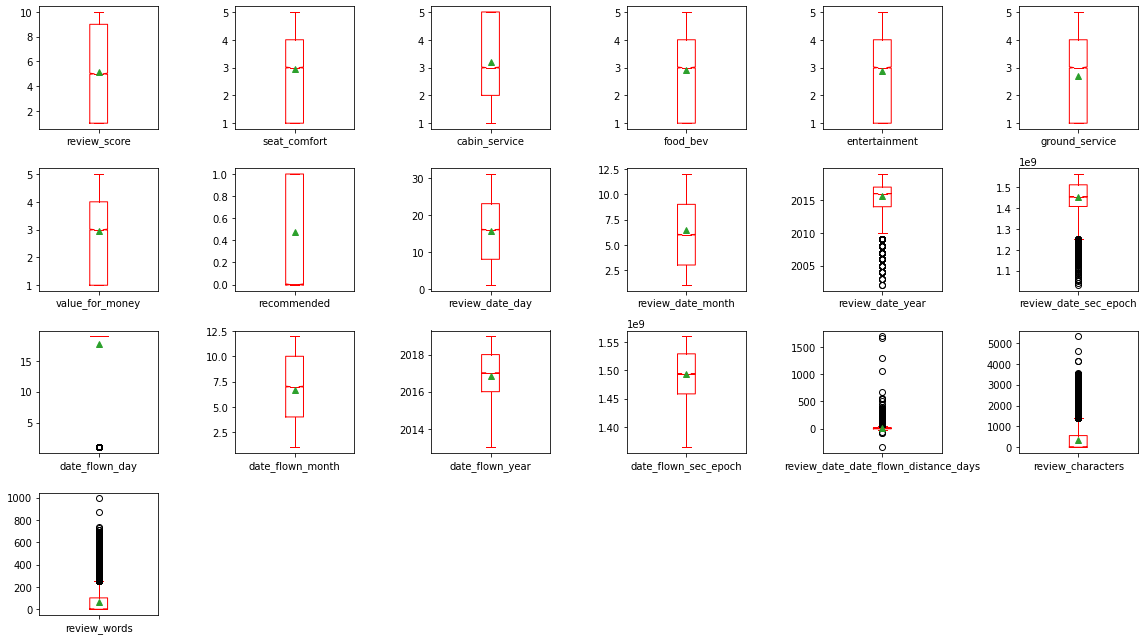

In [ ]:
# Chart - 4 visualization code
new_df.plot(kind = 'box', subplots = True, notch=True, showmeans=True, layout = (4,6), figsize = (16,9), color = 'red')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

From the box plot it is clearly visible that there are no outliers in the dataset which may affect the result further.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Correlation Heatmap

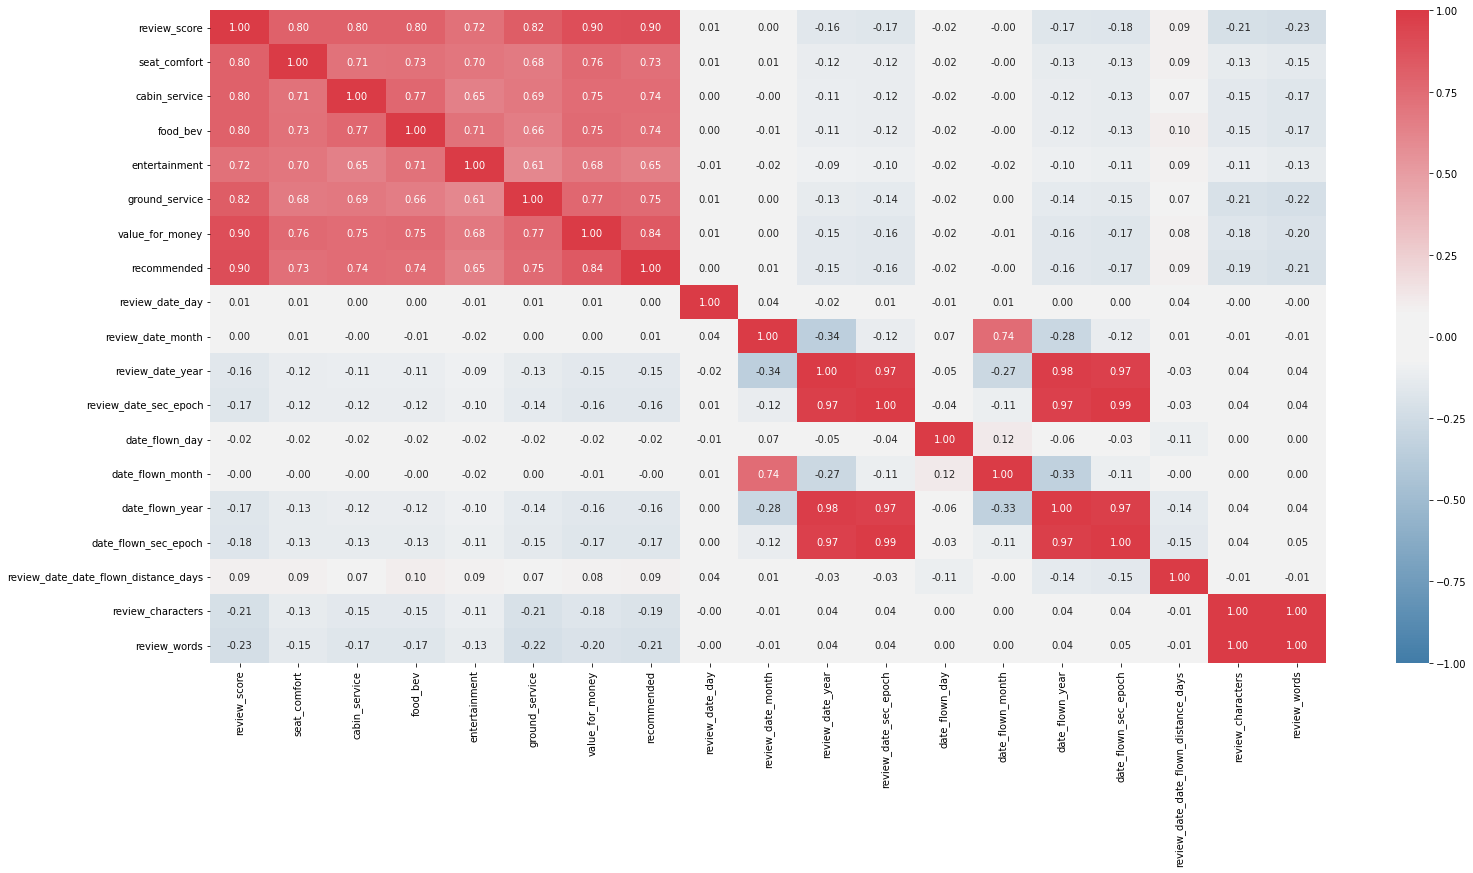

In [ ]:
# Correlation Heatmap visualization code
# Let's plot a correlation matrix among the features
def plot_cmap(matrix_values, figsize_w, figsize_h, filename):
    """
    Plot a heatmap corresponding to the input values.
    """
    if figsize_w is not None and figsize_h is not None:
        plt.figure(figsize=(figsize_w,figsize_h))
    else:
        plt.figure()
    cmap = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
    sns.heatmap(matrix_values, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1)
    plt.savefig(filename)
    plt.show()
    return cmap

cols_for_training = new_df.columns.to_list()
feats_bool = ['has_layover']
feats_cat = ['airline', 'traveller_type', 'cabin','review_text', 'pos_neu_neg_review_score']
feats_num = [feat for feat in cols_for_training if feat not in feats_bool and feat not in feats_cat]
corr_values = new_df[feats_num].dropna(axis=0,how='any').corr()
plot_cmap(matrix_values=corr_values, figsize_w=25, figsize_h=12, filename='./Corr.png')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Few points of notice:
* a positive correlation between the different types of review scores and subscores.
* a negative correlation between the length of the review text and the value of the different types of review scores and subscores.
* the similarity between using the number of characters and the number of words, from which we conclude that we can drop one of the two features.

#### Chart - 6

In [ ]:
def plot_two_hists_comp_sns(df_1,df_2,label_1,label_2,feat,bins,title,x_label,y_label,filename):
    """
    Plot two histograms of a given feature in two different datasets.
    """
    plt.figure(figsize=(6,6))
    sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
    sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()
    return

In [ ]:
df_recommended = new_df[new_df['recommended']==True].copy()
df_not_recommended = new_df[new_df['recommended']==False].copy()

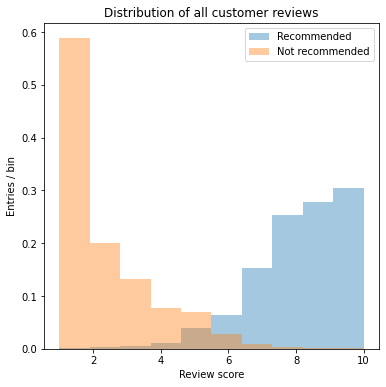

In [ ]:
plot_two_hists_comp_sns(df_1=df_recommended,
                        df_2=df_not_recommended,
                        label_1='Recommended',
                        label_2='Not recommended',
                        feat='review_score',
                        bins=10,
                        title='Distribution of all customer reviews',
                        x_label='Review score',
                        y_label='Entries / bin',
                        filename='./HistRecAndNotRec.png'
                        )

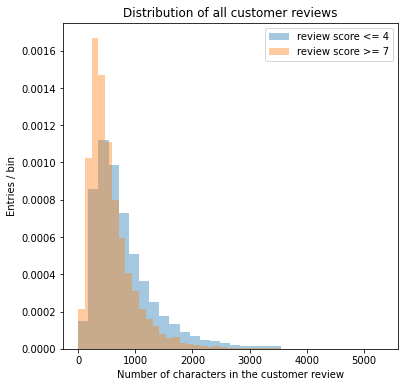

In [ ]:
plot_two_hists_comp_sns(df_1=df_no_duplicates[df_no_duplicates['review_score']<=4],
                        df_2=df_no_duplicates[df_no_duplicates['review_score']>=7],
                        label_1='review score <= 4',
                        label_2='review score >= 7',
                        feat='review_characters',
                        bins=30,
                        title='Distribution of all customer reviews',
                        x_label='Number of characters in the customer review',
                        y_label='Entries / bin',
                        filename='./HistReviewCharactersByReviewScore.png')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the relation I've used bar chart here.

##### 2. What is/are the insight(s) found from the chart?

Few points of notice:
* Positive customer reviews tend to be shorter than negative customer reviews (see mean of the distribution of the number of characters in the customer review). The same trend is observed if using the number of words instead of the number of characters.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Cabin if rated 4 or more, it is recommended by the passengers.
2. Review Score above 4 or more has been recommended by the passengers.
3. If avg service rating is above 3 it is recommended by the passengers.

In [ ]:
from numpy.linalg import norm
from scipy import stats
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df):
  if t!="true":
    # z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df, hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Cabin if rated 4 or more, it is recommended by the passengers.

Null Hypothesis: N < 4

Alternate Hypothesis : N = 4

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1 = new_df[(new_df["recommended"]>=1.0)]
hypo_1 = new_df[(new_df["cabin_service"]>=4.0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 4
sample_mean = hypo_1["cabin_service"].mean()
size = len(hypo_1)
std = (variance((hypo_1["cabin_service"])))**0.5

In [ ]:
# Getting Z value
z = (sample_mean - hypothesis_number)*math.sqrt(size)/std
# Getting P - Value
p = p_value(z=z, tailed='l', t="false", hypothesis_number=hypothesis_number, df=hypo_1["cabin_service"])
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 219.39382912383547.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and found true that if cabin is rated 4 or more, it is recommended by the passengers.

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference = hypo_1["cabin_service"].mean()- hypo_1["cabin_service"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -0.3827962752060028


As shown above the Mean median difference is around -0.38 and nearly zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Review Score above 4 or more has been recommended by the passengers.

Null Hypothesis: N < 4

Alternate Hypothesis : N = 4

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2 = new_df[(new_df["recommended"]>=1.0)]
hypo_2 = new_df[(new_df["review_score"]>=4.0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number2 = 4
sample_mean2 = hypo_2["review_score"].mean()
size2 = len(hypo_2)
std2 = (variance((hypo_2["review_score"])))**0.5

In [ ]:
# Getting Z value
z2 = (sample_mean2 - hypothesis_number2)*math.sqrt(size2)/std2
# Getting P - Value
p2 = p_value(z=z2, tailed='l', t="false", hypothesis_number=hypothesis_number2, df=hypo_2["review_score"])
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 397.37184110887137.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and found true that if cabin is rated 4 or more, it is recommended by the passengers.

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference = hypo_2["review_score"].mean()- hypo_2["review_score"].median()
print("Mean Median Difference is :-", mean_median_difference)

Mean Median Difference is :- -0.13459909848381368


As shown above the Mean median difference is around -0.13 and nearly zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

If avg service rating is above 3 it is recommended by the passengers.

Null Hypothesis: N < 3

Alternate Hypothesis : N = 3

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo_3 = new_df[(new_df["recommended"]>=1.0)]
hypo_3['service_rating'] = (hypo_3['seat_comfort']+hypo_3['cabin_service']+hypo_3['food_bev']+hypo_3['entertainment']+hypo_3['ground_service']+hypo_3['value_for_money'])/6

In [ ]:
# Getting the required parameter values for hypothesis testing
hypothesis_number3 = 3
sample_mean3 = hypo_3["service_rating"].mean()
size3 = len(hypo_3)
std3 = ((size3-1)*sample_mean3/hypothesis_number3)**0.5

In [ ]:
# Getting Z value
z3 = (sample_mean3 - hypothesis_number3)*math.sqrt(size3)/std3
# Getting P - Value
p3 = p_value(z=z3, tailed='l', t="false", hypothesis_number=hypothesis_number3, df=hypo_3["service_rating"])
# Getting Conclusion
print(conclusion(p3))

Failed to reject the Null Hypothesis for p = 0.9876208422088388.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and found true that if cabin is rated 4 or more, it is recommended by the passengers.

##### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference = hypo_3["service_rating"].mean()- hypo_3["service_rating"].median()
print("Mean Median Difference is :-", mean_median_difference)

Mean Median Difference is :- -0.16987877772191506


As shown above the Mean median difference is around -0.17 and nearly zero. Mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Percentage of non-null values.
filling_rates = 100.*df_no_duplicates.count().sort_values(ascending=False)/df_no_duplicates.shape[0]
print(filling_rates)

polarity                                100.000000
review_text                             100.000000
has_layover                             100.000000
review_characters                       100.000000
review_date_sec_epoch                    99.998366
review_date_year                         99.998366
review_date_month                        99.998366
review_date_day                          99.998366
airline                                  99.998366
review_date_timestamp                    99.998366
review_date                              99.998366
recommended                              97.674191
pos_neu_neg_review_score                 97.085792
review_score                             97.085792
value_for_money                          96.964843
cabin                                    95.948221
cabin_service                            91.919324
seat_comfort                             91.871925
food_bev                                 79.008875
entertainment                  

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_no_duplicates = df_no_duplicates[df_no_duplicates['airline'].notna()].copy()
df_no_duplicates.shape

(61182, 29)

In [ ]:
df_no_duplicates = df_no_duplicates.dropna(axis=0,how='any').copy()
df_no_duplicates.shape

(22826, 29)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Taken only non-null values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### Sentiment Analysis using VADER

Sentiment analysis is the field of NLP that aims at understanding the sentiment of a certain portion of text. One of the best-known packages for sentiment analysis is the open-source package VADER, which is part of NLTK.

VADER, acronym for Valence Aware Dictionary and sEntiment Reasoner, is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER is built on social media text but it is in general applicable to other domains, including customer reviews. VADER is based on a lexicon (vocabulary) that is validated by multiple human judges according to a well-defined and standard procedure. Each word in the lexicon is associated with a sentiment valence, consisting of two properties, polarity and intensity. The polarity describes if the text is positive/negative. The intensity describes how much the text is positive/negative, on a scale from -4 to 4. Words not included in the lexicon are classified as neutral.

To evaluate the sentiment of a sentence or list of sentences, VADER looks for words in the text that are part of the lexicon, modifies the intensity and polarity of the identified words according to a series of rules, sums up these values and then normalises to the range [-1,1]. VADER incorporates emojis (for example ":-)"), acronyms (for example "LOL") and slang (for example "nah"). The algorithm differs from a Bag of Words approach as it takes words order and degree modifiers into account, e.g. by increasing/decreasing the intensity of the sentiment

The output of the sentiment analysis is a series of scores, namely "compound", "pos", "neu" and "neg". The compound score is normalized between -1 (extremely negative) and 1 (extremely positive) and is a good metric if we need a single value that summarises the sentiment of a given sentence. The compound score can also be used to classify sentences into positive, neutral and negative by setting an appropriate threshold on the compound score. The official recommended threshold is:

* positive sentiment, compound score >= 0.05
* neutral sentiment, compound score <= 0.05 and >= -0.05
* negative sentiment, compound score <= -0.05

The positive, neutral and negative scores represent the fraction of the sentence that has a positive, neutral and negative sentiment. The sum of these three scores should sum up to 1. The positive, neutral and negative scores are a good metric if we need multiple values that summarise the sentiment of a given sentence.

In [ ]:
# Save the review text to a new list
df_no_duplicates['review_text'] = df_no_duplicates['review_text'].apply(str)
reviews_list = df_no_duplicates['review_text'].copy()
reviews_list.shape

(61183,)

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Augment the dataset with the overall polarity score of the review, as obtained using VADER on the review level.
reviews_polarity = []

for i_review, review in enumerate(reviews_list):
    review_polarity_scores = sid.polarity_scores(review)
    review_polarity_score_compound = review_polarity_scores['compound']
    
    '''Uncomment this to print the sentiment score of every review in the dataset.
    
    print('Review #{:d}: '.format(i_review), end='')
    for key in sorted(review_polarity_scores.keys()):
        print('{}: {:.4f}, '.format(key,review_polarity_scores[key]), end='')
    print('')  '''
    
    reviews_polarity.append(review_polarity_score_compound)

In [ ]:
df_no_duplicates['polarity'] = reviews_polarity
df_no_duplicates.head()

,airline,review_score,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,...,date_flown_timestamp,date_flown_day,date_flown_month,date_flown_year,date_flown_sec_epoch,review_date_date_flown_distance_days,review_characters,pos_neu_neg_review_score,has_layover,polarity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,0,None,False,0.0000
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,...,2019-05-01,1.0,5.0,2019.0,1.556669e+09,7.0,1094,Positive,True,0.9365
3,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,...,2019-05-01,1.0,5.0,2019.0,1.556669e+09,6.0,425,Negative,False,0.2732
5,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,...,2019-05-01,1.0,5.0,2019.0,1.556669e+09,6.0,1597,Negative,True,-0.9483
7,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,...,2019-04-16,16.0,4.0,2019.0,1.555373e+09,20.0,875,Positive,False,0.9718


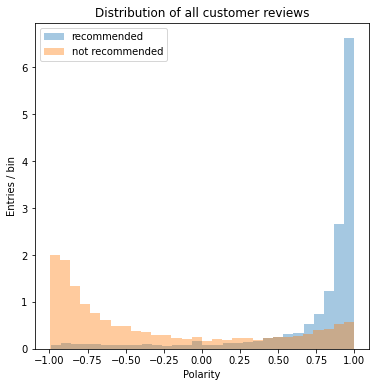

In [ ]:
def plot_two_hists_comp_sns(df_1,df_2,label_1,label_2,feat,bins,title,x_label,y_label,filename):
    """
    Plot two histograms of a given feature in two different datasets.
    """
    plt.figure(figsize=(6,6))
    sns.distplot(df_1[feat],hist=True,norm_hist=True,kde=False,label=label_1,bins=bins)
    sns.distplot(df_2[feat],hist=True,norm_hist=True,kde=False,label=label_2,bins=bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')
    plt.savefig(filename)
    plt.show()
    return

plot_two_hists_comp_sns(df_1=df_no_duplicates[df_no_duplicates['recommended']==True],
                        df_2=df_no_duplicates[df_no_duplicates['recommended']==False],
                        label_1='recommended',
                        label_2='not recommended',
                        feat='polarity',
                        bins=30,
                        title='Distribution of all customer reviews',
                        x_label='Polarity',
                        y_label='Entries / bin',
                        filename='./HistPolarityByRecommendation.png')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### 1. Expand Contraction

#### 2. Lower Casing

In [ ]:
# Airlines appearing in the dataset. This is the official name of the airlines. These words should be removed from the review text.
airlines_lower = df_no_duplicates['airline'].str.lower().unique().tolist()

#### 3. Removing Stopwords & Removing White spaces

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Stop words.
# Airlines appearing in the dataset. This is the official name of the airlines. These words should be removed from the review text.
airlines_lower = df_no_duplicates['airline'].str.lower().unique().tolist()
# Words appearing in the official name of the airlines. These words should be removed from the review text.
airlines_identifier = ['airlines',
                       'air lines',
                       'airline',
                       'air line',
                       'airways',
                       'air']
# In addition to the official name of the airlines, customers can use shortened versions of this name.
airlines_informal_lower = []
for airline in airlines_lower:
    found = False
    for airline_identifier in airlines_identifier:
        if found == False:
            if str(' '+airline_identifier) in airline:
                airline_informal = airline.replace(str(' '+airline_identifier),'')
                airlines_informal_lower.append(airline_informal)
                found = True
# Other stop words.
additional_stopwords = ['one','get','also','however','even','make']

In [ ]:
nltk_stopwords = stopwords.words('english')
nltk_stopwords_extended = nltk_stopwords + airlines_lower + airlines_identifier + airlines_informal_lower + additional_stopwords
print('Number of stopwords in NLTK: {:d}'.format(len(nltk_stopwords)))
print('Number of stopwords after extension: {:d}'.format(len(nltk_stopwords_extended)))

Number of stopwords in NLTK: 179
Number of stopwords after extension: 318


#### 4. Removing Punctuations

In [ ]:
import string
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def text_cleaner(text):
    # Transform the text so that all words are lower case.
    text = text.lower()
    # Remove stop words corresponding to airlines. This is needed here as airline names can consist of multiple words and will not be removed after splitting by words.
    for airline_lower in airlines_lower:
        text = text.replace(airline_lower, '')
    # Remove punctuation and tokenize the text into individual words.
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # Remove stop words.
    text = [word for word in text if word not in nltk_stopwords_extended]
    # Remove empty tokens.
    text = [word for word in text if len(word)>0]
    # Lemmatize the text.
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(i_pos_tag[0], get_wordnet_pos(i_pos_tag[1])) for i_pos_tag in pos_tags]
    return text

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df_no_duplicates['review_text_clean'] = df_no_duplicates['review_text'].apply(lambda x: text_cleaner(x))

#### 5. Removing URLs & Removing words and digits contain digits.

In [ ]:
def text_cleaner2(text):
    # Transform the text so that all words are lower case.
    text = text.lower()
    # Remove words that contain numbers.
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # POS tagging of the text.
    pos_tags = pos_tag(text)
    # Remove words with only one letter.
    text = [word for word in text if len(word)>1]
    # Join the text with space as a word delimiter.
    text = " ".join(text)
    # Remove non-ASCII characters.
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    return text

In [ ]:
df_no_duplicates['review_text_clean'] = df_no_duplicates['review_text'].apply(lambda x: text_cleaner2(x))

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Make a list of the reviews.
corpus = df_no_duplicates['review_text_clean'].values

In [ ]:
vectorizer_ngrams = CountVectorizer(binary=False, ngram_range=(1, 1), analyzer='word', min_df=50)
vectorizer_ngrams.fit(corpus)

CountVectorizer(min_df=50)

In [ ]:
vec_review_text_clean_feats = vectorizer_ngrams.get_feature_names()
vec_review_text_clean_feats[:10]

['aa',
 'ababa',
 'ability',
 'able',
 'aboard',
 'abrupt',
 'absolute',
 'absolutely',
 'abu',
 'abysmal']

In [ ]:
vec_review_text_clean = vectorizer_ngrams.transform(df_no_duplicates['review_text_clean'])
print(vec_review_text_clean.shape)
print(vec_review_text_clean.dtype)

(22826, 2442)
int64


In [ ]:
vec_review_text_clean_feats_new = ['count_'+feat for feat in vec_review_text_clean_feats]
df_vec_review_text_clean = pd.DataFrame(vec_review_text_clean.toarray(),columns=vec_review_text_clean_feats_new)

In [ ]:
df_vec_review_text_clean.head()

,count_aa,count_ababa,count_ability,count_able,count_aboard,count_abrupt,count_absolute,count_absolutely,count_abu,count_abysmal,...,count_yet,count_yoghurt,count_york,count_young,count_youre,count_yvr,count_yyz,count_zero,count_zone,count_zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_nlp_final = pd.concat([df_no_duplicates, df_vec_review_text_clean], axis=1)
df_nlp_final.head()

,airline,review_score,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,...,count_yet,count_yoghurt,count_york,count_young,count_youre,count_yvr,count_yyz,count_zero,count_zone,count_zurich
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_nlp_final = df_nlp_final.dropna()

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Categorical Encoding

In [ ]:
# Encode your categorical columns
df_nlp_final['has_layover_num'] = (df_nlp_final['has_layover'].notnull()).astype(int)
df_nlp_final['date_flown_day'] = (df_nlp_final['date_flown_day'].notnull()).astype(int)
df_nlp_final['date_flown_month'] = (df_nlp_final['date_flown_month'].notnull()).astype(int)
df_nlp_final['date_flown_year'] = (df_nlp_final['date_flown_year'].notnull()).astype(int)

df_nlp_final['seat_comfort'] = (df_nlp_final['seat_comfort'].notnull()).astype(int)
df_nlp_final['cabin_service'] = (df_nlp_final['cabin_service'].notnull()).astype(int)
df_nlp_final['ground_service'] = (df_nlp_final['ground_service'].notnull()).astype(int)
df_nlp_final['food_bev'] = (df_nlp_final['food_bev'].notnull()).astype(int)
df_nlp_final['value_for_money'] = (df_nlp_final['value_for_money'].notnull()).astype(int)
df_nlp_final['entertainment'] = (df_nlp_final['entertainment'].notnull()).astype(int)
df_nlp_final['polarity'] = (df_nlp_final['polarity'].notnull()).astype(int)

In [ ]:
# Label Encoding
le = LabelEncoder()

In [ ]:
cat_feats = ['airline', 'traveller_type', 'cabin']
for feat in cat_feats:
    print('Feature:', feat)
    df_nlp_final[feat] = le.fit_transform(df_nlp_final[feat])

Feature: airline
Feature: traveller_type
Feature: cabin


In [ ]:
df_nlp_final[cat_feats].head()

,airline,traveller_type,cabin
1,6,0,1
3,6,2,1
5,6,0,1
7,6,3,1
9,6,3,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Float values converted into integer values. Label encoding used for airline, traveller_type and cabin features.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
num_feats = list(df_nlp_final.columns)
num_feats = [ele for ele in num_feats if ele not in {'airline', 'traveller_type', 'cabin', 'review_text', 'review_date_day', 'review_date_month', 'review_date_year', 'date_flown_day', 'review_characters', 'pos_neu_neg_review_score', 'recommended', 'review_text_clean',}]
cat_feats = ['airline', 'traveller_type', 'cabin']
feats = num_feats+cat_feats

In [ ]:
# Data for all the independent variables
X = df_nlp_final.drop(labels='recommended',axis=1)
X.drop(columns=['review_date','date_flown','review_text','pos_neu_neg_review_score','has_layover','review_text_clean','review_date_timestamp','date_flown_timestamp'],inplace=True)

# Data for the dependent variable
Y = df_nlp_final['recommended']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 7. Data Scaling

In [ ]:
# Scaling your data
# Create a pipeline for numerical features and a pipeline for categorical features.
num_proc = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'), StandardScaler())
cat_proc = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), OneHotEncoder(handle_unknown='ignore'))

# Create a preprocessing step for all features.
preprocessor = make_column_transformer((num_proc, num_feats), (cat_proc, cat_feats))

##### Which method have you used to scale you data and why?

### 9. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 10. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42)

In [ ]:
X_train.shape

(4064, 2464)

In [ ]:
X_test.shape

(1742, 2464)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, our parameter estimates have greater variance. With less testing data, our performance statistic will have greater variance. Broadly speaking we should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If we have a total of 100 instances, we'll probably stuck with cross validation as no single split is going to give us satisfactory variance in our estimates. If we have 100,000 instances, it doesn't really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data if our method is particularly computationally intensive).

In this case I have taken 70:30 ratio.

### 11. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

### ML Model - 1 Logistic Regression

Accuracy = 0.5436280137772675
ROC Area under Curve = 0.5434464483467806
Time taken = 29.766672372817993
              precision    recall  f1-score   support

         0.0    0.53846   0.52907   0.53372       860
         1.0    0.54849   0.55782   0.55312       882

    accuracy                        0.54363      1742
   macro avg    0.54348   0.54345   0.54342      1742
weighted avg    0.54354   0.54363   0.54354      1742



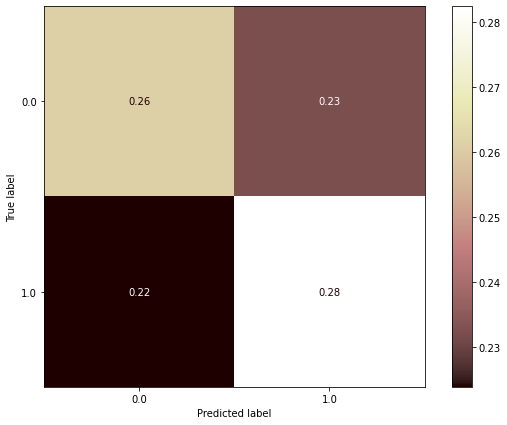

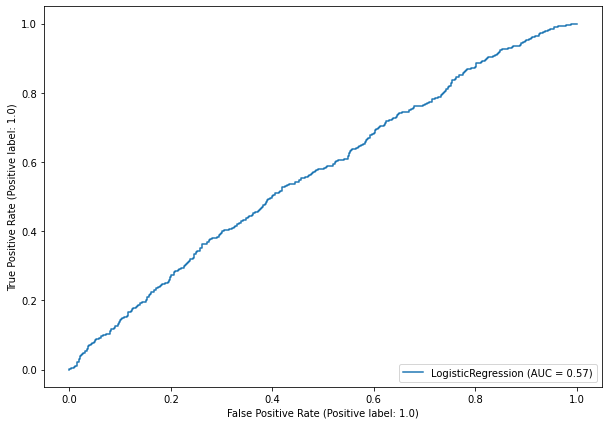

In [ ]:
# ML Model - 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)
params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}
# Fit the Algorithm
model_lr = LogisticRegression(**params_lr)
# Predict on the model
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, Y_train, X_test, Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Best: 0.467899 using {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy = 0.5436280137772675
ROC Area under Curve = 0.5460712967357485
Time taken = 0.7284965515136719
              precision    recall  f1-score   support

         0.0    0.52693   0.73953   0.61538       860
         1.0    0.58131   0.35261   0.43896       882

    accuracy                        0.54363      1742
   macro avg    0.55412   0.54607   0.52717      1742
weighted avg    0.55446   0.54363   0.52606      1742



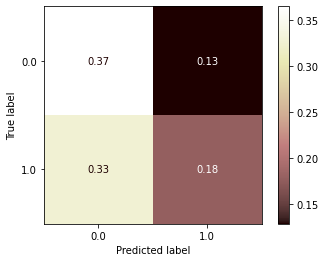

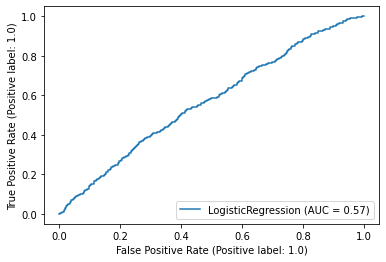

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predict on the model
# Get the predicted classes
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model, X_train, Y_train, X_test, Y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

The goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After hyperparameter tuning very little improvement in ROC_AUC observed.

### ML Model - 2 Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy = 0.9161882893226176
ROC Area under Curve = 0.9161314138058323
Time taken = 3.095566511154175
              precision    recall  f1-score   support

         0.0    0.91803   0.91163   0.91482       860
         1.0    0.91441   0.92063   0.91751       882

    accuracy                        0.91619      1742
   macro avg    0.91622   0.91613   0.91617      1742
weighted avg    0.91620   0.91619   0.91618      1742



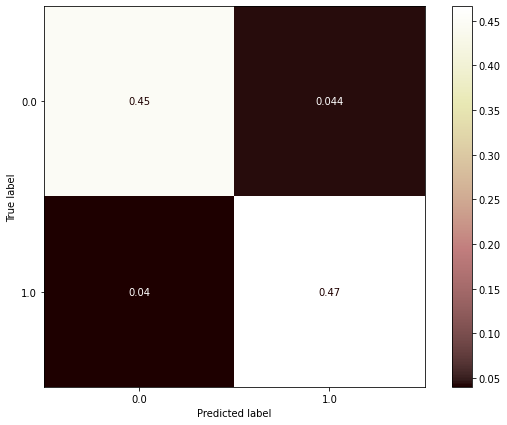

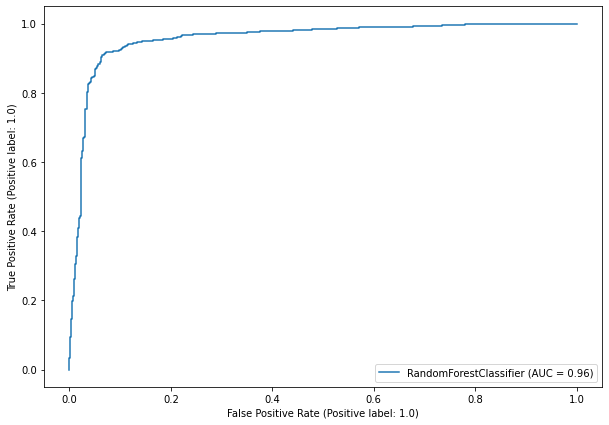

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, Y_train, X_test, Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

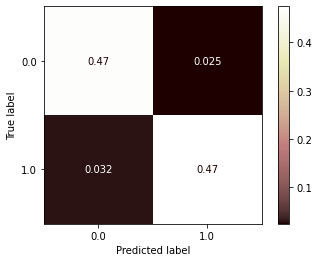

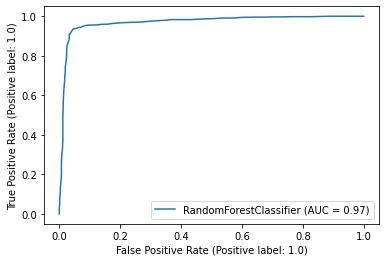

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='f1')
# Fit the Algorithm
rf_grid.fit(X_train,Y_train)
# Predict on the model
# Making predictions on train and test data
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(rf_model, X_train, Y_train, X_test, Y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is improvement in the model after hyperparameter tuning. The model had accuracy of 0.92 which improved to 0.94 after hyperparametr tuning. ROC_AUC before was 0.92 and after hyperparameter tuning 0.94. There is improvement in precision, recall and f1 score also. Below is the table showing the changes after hyperparametr tuning.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Without Hyperparameter Tuning", "After Hyperparameter Tuning"])
train.add_row(['1','Time Taken','3.10 min', '3.86 min'])
train.add_row(['2','Accuracy','0.92', '0.94'])
train.add_row(['3','Precision','0.91','0.94'])
train.add_row(['4','Recall','0.91','0.95'])
train.add_row(['5','F1-Score','0.92','0.94'])
train.add_row(['6','ROC_AUC','0.92','0.94'])
print(train)

+-------+------------+-------------------------------+-----------------------------+
| SL NO |  Metrices  | Without Hyperparameter Tuning | After Hyperparameter Tuning |
+-------+------------+-------------------------------+-----------------------------+
|   1   | Time Taken |            3.10 min           |           3.86 min          |
|   2   |  Accuracy  |              0.92             |             0.94            |
|   3   | Precision  |              0.91             |             0.94            |
|   4   |   Recall   |              0.91             |             0.95            |
|   5   |  F1-Score  |              0.92             |             0.94            |
|   6   |  ROC_AUC   |              0.92             |             0.94            |
+-------+------------+-------------------------------+-----------------------------+


### ML Model - 3 Extreme Gradient Boosting

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy = 0.9460390355912744
ROC Area under Curve = 0.9461174392237515
Time taken = 332.83535861968994
              precision    recall  f1-score   support

         0.0    0.93922   0.95233   0.94573       860
         1.0    0.95287   0.93991   0.94635       882

    accuracy                        0.94604      1742
   macro avg    0.94605   0.94612   0.94604      1742
weighted avg    0.94613   0.94604   0.94604      1742



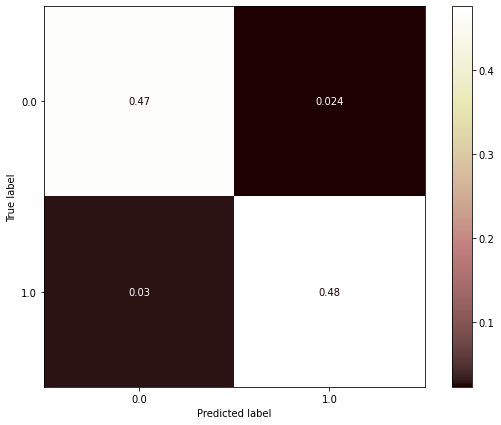

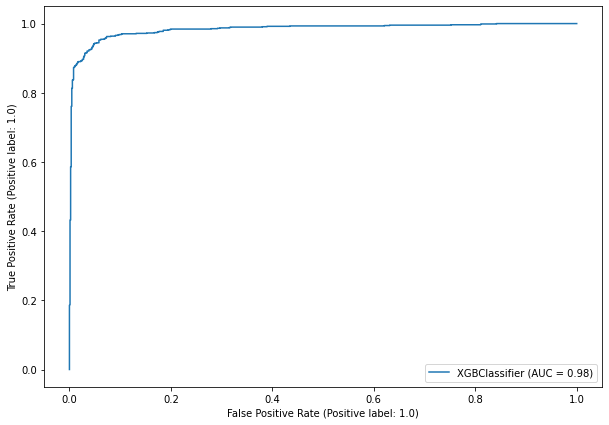

In [ ]:
# ML Model - 3 Implementation
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}
# Fit the Algorithm
model_xgb = xgb.XGBClassifier(**params_xgb)
# Predict on the model
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, Y_train, X_test, Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  12.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  11.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  10.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  10.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  10.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  17.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  16.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  16.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=  16.7s
[CV] END max_depth=4, min_sam

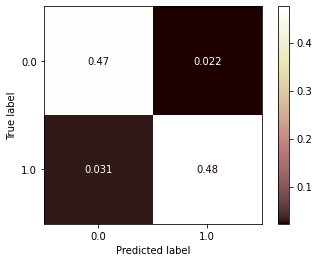

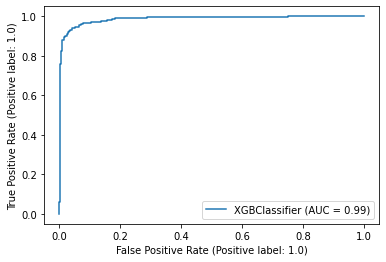

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()
# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,Y_train)
# Predict on the model
# Making predictions on train and test data
train_class_preds = xg_grid1.predict(X_train)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(xg_model, X_train, Y_train, X_test, Y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not seeing much improvements after hyperparameter tuning.

In [ ]:
# Training Set
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"Metrices", "Without Hyperparameter Tuning", "After Hyperparameter Tuning"])
train.add_row(['1','Time Taken','5.52 min', '21.86 min'])
train.add_row(['2','Accuracy','0.95', '0.95'])
train.add_row(['3','Precision','0.94','0.94'])
train.add_row(['4','Recall','0.95','0.95'])
train.add_row(['5','F1-Score','0.95','0.95'])
train.add_row(['6','ROC_AUC','0.95','0.95'])
print(train)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with both Recall, Precision, f1_score and AUC - ROC.

To reduce false negative recall is important and to reduce false positives precision is important. Where both are important to be minimized, f1_score is being considered. False Positive is defined as the model predicted that the customer will not recommend but the customer did recommend. Again false negative defines as model will predict that the customer recommend but the customer didn't recommend. That will be an issue for us. So, for that case we have to minimize the false negative. And, false positive we must improve the score of both precision as well as recall. So, in our case recall will stand the higher but precision can't be neglected. so, recall should be higher and f1_score should be moderate.

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model without hyprparameter tuning. The reason behing selecting model without hyperparameter tuning is that there is no significant improvement shown after hyperparmeter tuning and also it took more time to give result after hyperparameter tuning.

However, XGBoost is slower than logistic regression and random forest but is better than these models.

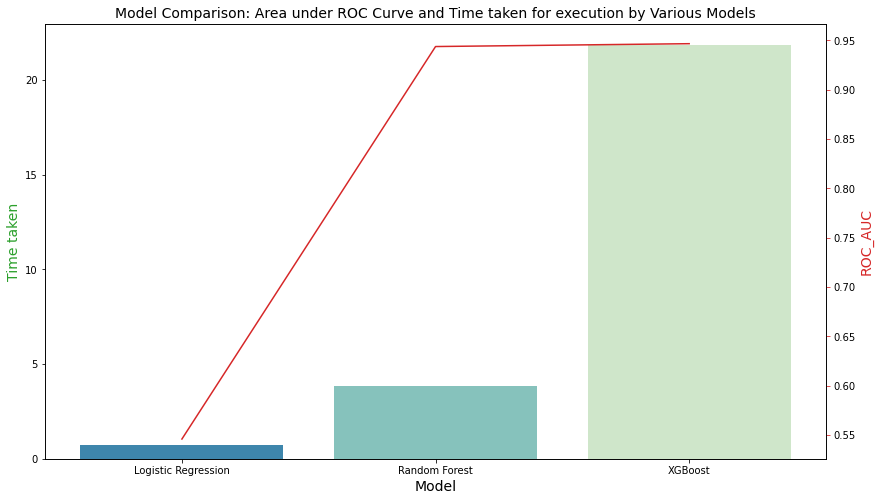

In [ ]:
roc_auc_scores = [roc_auc_lr, roc_auc_rf, roc_auc_xgb]
tt = [tt_lr, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Random Forest','XGBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=14)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_model)
shap_values = explainer(X_test) 

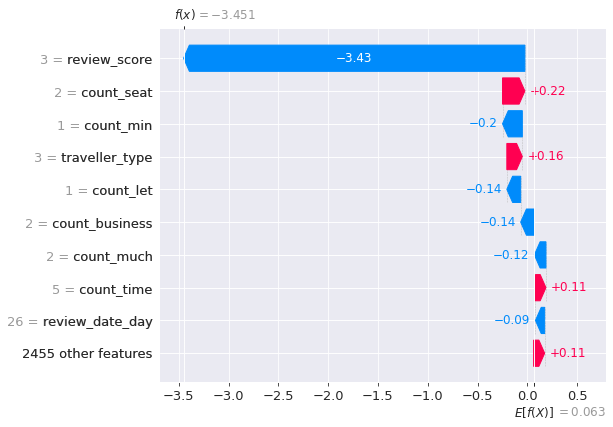

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

Answer Here.

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Answer Here

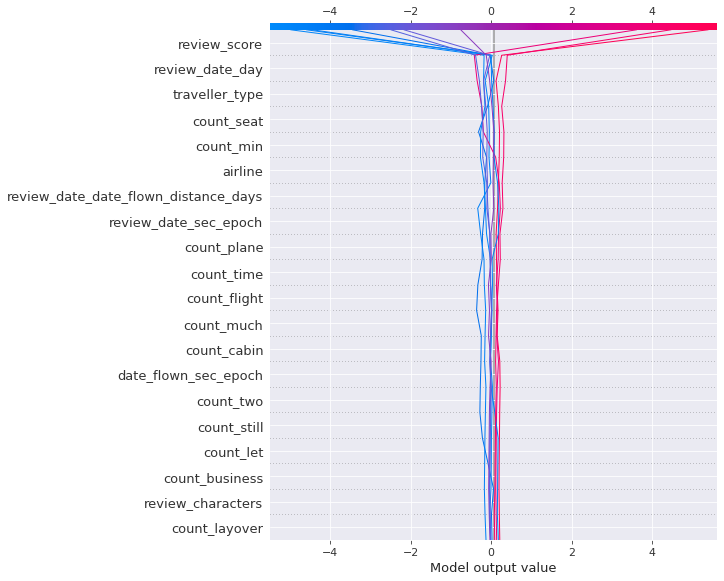

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Answer here

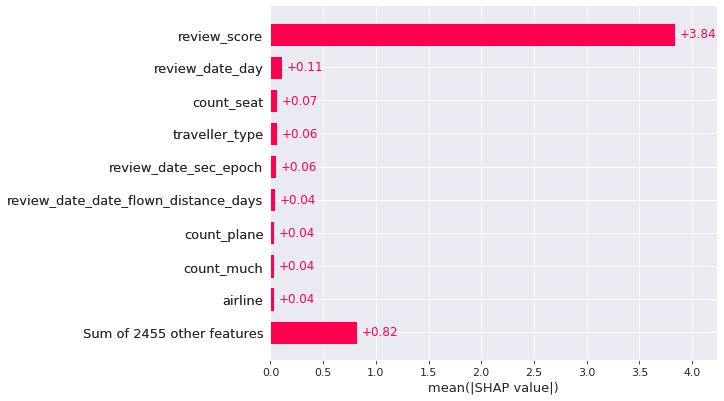

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

Answer here

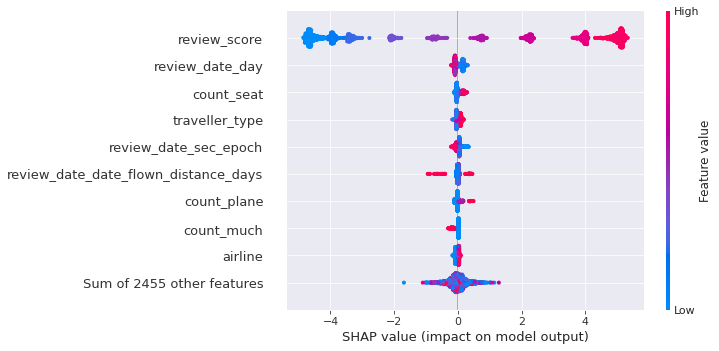

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Answer here

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After implementing the algorithms, I've come across that XGBoost is better than other models as it shows a slightly good result than the others. This in turn helps to conclude that XGBoost Model is more efficient and reliable in predicting the taxi trip duration as compared to other models. We can also use Naive Bayes Classifier, K-Nearest Neighbor Classifier, Decision Tree Classifier, Neural Network or Adaptive Gradient Boosting.

There's always a room for the improvement and a lot more to explore. At this point, here are a few things we could do to improve our model:
* Add more training instances to improve validation curve in the XGBoost model.
* Reduce the numbers of features in the training data that we currently use. The algorithm will still fit the training data very well, but due to the decreased number of features, it will build less complex models. This should increase the bias and decrease the variance.

Here are some points which can help in increasing ratings as well as recommendation from the passengers:
* Improve facilities in economy class as it has most recommendations.
* Modify cirst class or business class packages as these got least recommendations.
* Airlines need to improve their seat comfort, entertainment & ground service.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***